# Capstone Module 2 : Data Analysis using dataset *AWS SaaS Sales*

### Amazon Web Services (AWS)

Amazon Web Services (AWS) is a comprehensive cloud computing platform provided by Amazon. It offers a wide range of services, including computing power, storage, and databases, along with advanced functionalities such as machine learning, artificial intelligence, the Internet of Things (IoT), data analytics, and security. AWS provides these services on a global scale, with data centres located around the world, allowing businesses to deploy applications closer to end-users to improve performance.

Key services include:

1. **Compute Services:** EC2 (Elastic Compute Cloud) provides scalable virtual servers, while Lambda offers serverless computing to run code without managing servers.
2. **Storage Services:** S3 (Simple Storage Service) is a scalable object storage solution, and EBS (Elastic Block Store) provides persistent block storage for use with EC2.
3. **Database Services:** RDS (Relational Database Service) supports SQL databases, and DynamoDB is a NoSQL database.
4. **Networking:** VPC (Virtual Private Cloud) enables the creation of isolated networks within the AWS cloud.
5. **Security and Identity:** IAM (Identity and Access Management) helps manage access to AWS services and resources securely.

### AWS SaaS (Software as a Service)

SaaS on AWS refers to the delivery of software applications over the internet, hosted on AWS infrastructure. This model allows users to access software from any device with an internet connection, typically via a web browser, without worrying about the underlying infrastructure.

Benefits of SaaS on AWS:

1. **Scalability:** Easily scale applications to meet demand.
2. **Reliability:** AWS's robust infrastructure ensures high availability and disaster recovery.
3. **Security:** AWS provides strong security features and compliance certifications.
4. **Cost Efficiency:** The pay-as-you-go pricing model reduces the need for large upfront investments in hardware and software.
5. **Speed to Market:** Rapid deployment and iteration of applications due to the wide range of managed services.

### Sales in AWS

AWS sales encompass a range of strategies and services aimed at helping customers adopt and maximise their use of AWS services. This includes direct sales teams, partner networks, and various programmes designed to facilitate cloud adoption.

Key aspects include:

1. **Direct Sales Teams:** AWS employs sales professionals who work with customers to understand their needs, provide solutions, and help with the migration to AWS.
2. **Partner Network (APN):** AWS collaborates with a broad ecosystem of partners, including Independent Software Vendors (ISVs), system integrators (SIs), and managed service providers (MSPs) to deliver tailored solutions.
3. **Marketplace:** AWS Marketplace is an online store where customers can find, buy, and immediately start using software and services that run on AWS.
4. **Customer Support and Training:** AWS provides extensive support services and training programmes like AWS Support, AWS Training and Certification, and AWS Professional Services to ensure customers can effectively utilise AWS solutions.
5. **Programmes and Incentives:** AWS offers various programmes such as the AWS Migration Acceleration Programme (MAP) to assist organisations in moving to the cloud, as well as promotional credits and financial incentives to encourage cloud adoption.

AWS's sales strategy focuses on providing comprehensive solutions that meet the diverse needs of businesses, from start-ups to large enterprises, ensuring they can leverage the full potential of cloud computing.

### Dataset
This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a product in a transaction, and the columns include:
Here is the Original Dataset: [AWS SaaS Sales](https://drive.google.com/file/d/1883L4RGuqA0AnH6qyNIdWLIomZcxUhWk/view?usp=share_link)
| Column       | Description                                          |
|--------------|------------------------------------------------------|
| Row ID       | A unique identifier for each transaction.            |
| Order ID     | A unique identifier for each order.                  |
| Order Date   | The date when the order was placed.                  |
| Date Key     | A numerical representation of the order date (YYYYMMDD). |
| Contact Name | The name of the person who placed the order.         |
| Country      | The country where the order was placed.              |
| City         | The city where the order was placed.                 |
| Region       | The region where the order was placed.               |
| Subregion    | The subregion where the order was placed.            |
| Customer     | The name of the company that placed the order.       |
| Customer ID  | A unique identifier for each customer.               |
| Industry     | The industry the customer belongs to.                |
| Segment      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| Product      | The product was ordered.                             |
| License      | The license key for the product.                     |
| Sales        | The total sales amount for the transaction.          |
| Quantity     | The total number of items in the transaction.        |
| Discount     | The discount applied to the transaction.             |
| Profit       | The profit from the transaction.                     |


### Data Preparation

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import folium
from geopy.geocoders import Nominatim
from IPython.display import display

In [2]:
#Load Dataset
df = pd.read_csv('/Users/macbook/Downloads/explore_it/AWS SaaS Sales/SaaS-Sales.csv')
df.head()
df.shape
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


### Undertanding and Cleaning the Data

In [3]:
#Viewing the data type of each column
df.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [4]:
#Observing data types and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [6]:
# Data Unique
def unique(df):
    uniquedata=pd.DataFrame()
    uniquedata['Columns'] = df.columns
    uniquedata['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    uniquedata['Unique'] = [df[col].unique() for col in (df.columns)]

    return uniquedata
unique(df[['Contact Name','Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product']])


,Columns,Unique Count,Unique
0,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
1,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
2,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
3,Region,3,"[EMEA, AMER, APJ]"
4,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
5,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
6,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
7,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."
8,Segment,3,"[SMB, Strategic, Enterprise]"
9,Product,14,"[Marketing Suite, FinanceHub, ContactMatcher, ..."


In [7]:
# Standardize date format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date Key'] = df['Order Date'].dt.strftime('%Y%m%d').astype(int)

# Standardize text columns
df['Country'] = df['Country'].str.title().str.strip()
df['City'] = df['City'].str.title().str.strip()
df['Region'] = df['Region'].str.title().str.strip()
df['Subregion'] = df['Subregion'].str.title().str.strip()
df['Contact Name'] = df['Contact Name'].str.title().str.strip()
df['Customer'] = df['Customer'].str.title().str.strip()
df['Industry'] = df['Industry'].str.title().str.strip()
df['Segment'] = df['Segment'].str.title().str.strip()
df['Product'] = df['Product'].str.title().str.strip()

# Ensure numeric columns are of correct type
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Check for duplicate rows and drop them
df = df.drop_duplicates()

# Check for duplicate columns and drop them 
df = df.loc[:,~df.columns.duplicated()]

# Check for duplicate rows and drop them
df = df.drop_duplicates()   

#Display dataset
display(df)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Financehub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,Amer,Namer,Phillips 66,1056,Energy,Strategic,Financehub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Contactmatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,Emea,Eu-West,Johnson & Johnson,1055,Healthcare,Smb,Saas Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,1005,Finance,Smb,Saas Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,1005,Finance,Smb,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,1005,Finance,Smb,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


### Country with Sales and Profit

In [8]:
# Aggregate the data by Country
country_sales_profit = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

### Top 10 Countries on Highest Sales

In [9]:
# Grouping the data by country and summing the sales and profit for each country
country_sales_profit = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sorting the data by top sales
country_sales_profit_sorted = country_sales_profit.sort_values(by='Sales', ascending=False)

# Limiting the results to top 10
top_10_sales_profit = country_sales_profit_sorted.head(10)

# Displaying the filtered dataset
print(top_10_sales_profit[['Country', 'Sales', 'Profit']])

           Country        Sales      Profit
47   United States  457687.6315  76381.3871
46  United Kingdom  313169.8810  74989.0891
24           Japan  170188.0458 -25729.3563
5           Canada  138641.2700  33402.6517
15          France  116511.9140 -15559.9603
16         Germany   89473.7080  -3399.3017
1        Australia   80166.1010 -12607.8870
26          Mexico   78258.1360 -16971.3766
4           Brazil   76269.6140  24463.1876
40           Spain   70636.7200  18597.9504


### Top 10 Countries with lowest profit

In [10]:
# Sorting the data by lowest profit
country_sales_profit_sorted = country_sales_profit.sort_values(by='Profit', ascending=True)

# Limiting the results to top 10
top_10_lowest_profit = country_sales_profit_sorted.head(10)

# Displaying the filtered dataset
print(top_10_lowest_profit[['Country', 'Sales', 'Profit']])

         Country        Sales      Profit
24         Japan  170188.0458 -25729.3563
26        Mexico   78258.1360 -16971.3766
15        France  116511.9140 -15559.9603
1      Australia   80166.1010 -12607.8870
41        Sweden   55603.1640  -7490.9122
34        Russia   32108.1180  -6527.8579
38  South Africa   30661.8730  -5341.6936
6          Chile   35282.0010  -3427.9246
16       Germany   89473.7080  -3399.3017
3        Belgium   17431.1500  -1190.4705


#### Based on the data above, we find that Japan has a high sales value, even ranking third in sales, but it has the lowest profit. From this fact, I will analyse the phenomenon of sales in Japan.


In [11]:
# Filter the dataset for rows where the country is Japan
japan_data = df[df['Country'] == 'Japan']

# Calculate quartiles for sales and profit in Japan
sales_quartiles = japan_data['Sales'].quantile([0.25, 0.5, 0.75])
profit_quartiles = japan_data['Profit'].quantile([0.25, 0.5, 0.75])

# Display quartiles for sales and profit in Japan
print("Quartiles for Sales in Japan:")
print(sales_quartiles)
print("\nQuartiles for Profit in Japan:")
print(profit_quartiles)

Quartiles for Sales in Japan:
0.25     10.824
0.50     36.288
0.75    158.376
Name: Sales, dtype: float64

Quartiles for Profit in Japan:
0.25   -17.0274
0.50     0.3336
0.75     6.9986
Name: Profit, dtype: float64


##### Sales Distribution: 
The sales values vary significantly, with a steep increase between the 50th and 75th percentiles, suggesting that while a majority of the sales figures are moderate, there are a few high sales values pulling up the upper quartile.

##### Profit Distribution: 
The profit values indicate a challenging situation, with a substantial number of entries experiencing losses (as seen in the negative 1st quartile). Even the 75th percentile profits are relatively low, reflecting that overall profitability is constrained.

##### Conclusion:
While sales in Japan show a broad range with some high values, profitability is a concern, with many instances of losses and only a slight positive median profit. This suggests that despite achieving sales, the company struggles to maintain profitability.

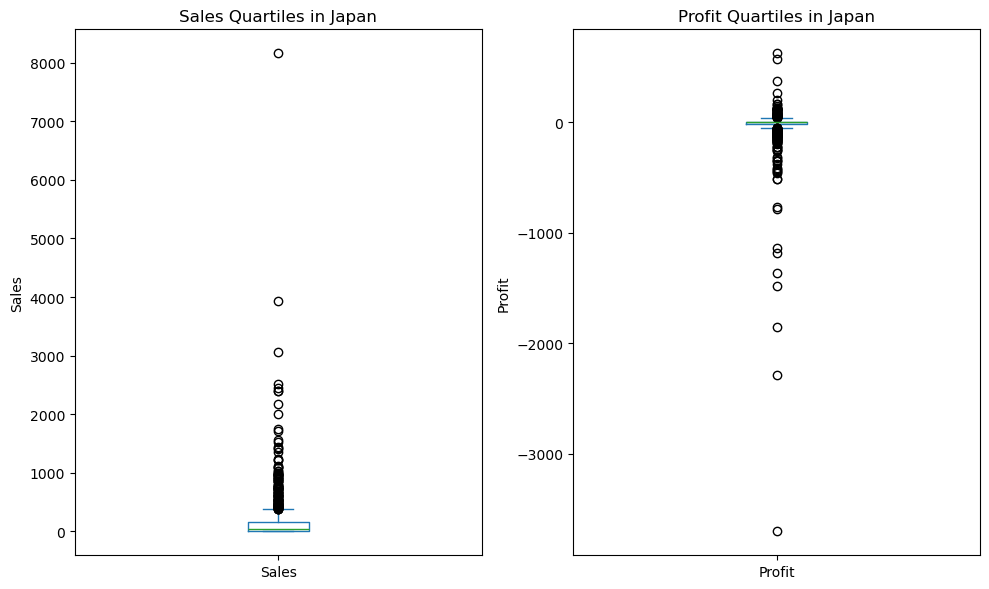

In [12]:
# Calculate quartiles for sales and profit in Japan
sales_quartiles = japan_data['Sales'].quantile([0.25, 0.5, 0.75])
profit_quartiles = japan_data['Profit'].quantile([0.25, 0.5, 0.75])

# Plotting quartiles for sales in Japan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
japan_data['Sales'].plot(kind='box')
plt.title('Sales Quartiles in Japan')
plt.ylabel('Sales')

# Plotting quartiles for profit in Japan
plt.subplot(1, 2, 2)
japan_data['Profit'].plot(kind='box')
plt.title('Profit Quartiles in Japan')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

This image displays two box plots, one showing the distribution of sales quartiles and the other showing the distribution of profit quartiles in Japan.

The sales quartiles box plot shows a relatively concentrated distribution, with the bulk of the data points (represented by the box) falling between around 2,000 and 3,500 sales units. However, there are some outliers above the box, indicating a few companies with significantly higher sales than the majority.

Conversely, the profit quartiles box plot exhibits a much wider distribution, spanning both positive and negative values. The median profit (represented by the line inside the box) appears to be slightly positive, but the lower quartile extends to around -2,000 profit units, and there are outliers both above and below the box, suggesting a substantial variation in profitability among the companies in the dataset.

Overall, this visualisation allows for a comparison of the variability in sales and profit performances, with sales being more tightly clustered around a common range, while profits exhibit a greater spread, potentially indicating diverse business models, cost structures, or market conditions among the companies analysed.

In [13]:
# Filter the dataset for rows where the country is Japan
japan_data = df[df['Country'] == 'Japan']

# Exclude specified columns
columns_to_exclude = ['License', 'Region', 'Subregion', 'Country', 'Date Key', 'Row ID']

# Drop the specified columns
japan_data_filtered = japan_data.drop(columns=columns_to_exclude)

# Reset the index
japan_data_filtered.reset_index(drop=True, inplace=True)

# Display the filtered data
japan_data_filtered

,Order ID,Order Date,Contact Name,City,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,APJ-2021-118983,2021-11-22,Emily Morrison,Saitama,Pfizer,1074,Healthcare,Enterprise,Oneview,68.8100,5,0.80,-123.8580
1,APJ-2021-118983,2021-11-22,Emily Morrison,Saitama,Pfizer,1074,Healthcare,Enterprise,Contactmatcher,2.5440,3,0.80,-3.8160
2,APJ-2023-107727,2023-10-20,Amelia Campbell,Tokyo,Glencore,1083,Misc,Enterprise,Support,29.4720,3,0.20,9.9468
3,APJ-2022-117590,2022-12-09,Chloe Short,Aichi,Procter & Gamble,1077,Consumer Products,Strategic,Site Analytics,1097.5440,7,0.20,123.4737
4,APJ-2022-117590,2022-12-09,Chloe Short,Aichi,Procter & Gamble,1077,Consumer Products,Strategic,Saas Connector Pack,190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,APJ-2022-149272,2022-03-16,Pippa Edmunds,Hiroshima,Bnp Paribas,1065,Finance,Strategic,Financehub,528.4300,5,0.30,-143.4310
981,APJ-2022-149272,2022-03-16,Pippa Edmunds,Hiroshima,Bnp Paribas,1065,Finance,Strategic,Contactmatcher,22.3860,7,0.80,-35.8176
982,APJ-2021-168088,2021-03-19,Harry Buckland,Tokyo,News Corp.,1071,Misc,Enterprise,Support,65.5840,2,0.20,23.7742
983,APJ-2021-168088,2021-03-19,Harry Buckland,Tokyo,News Corp.,1071,Misc,Enterprise,Marketing Suite,383.4656,4,0.32,-67.6704


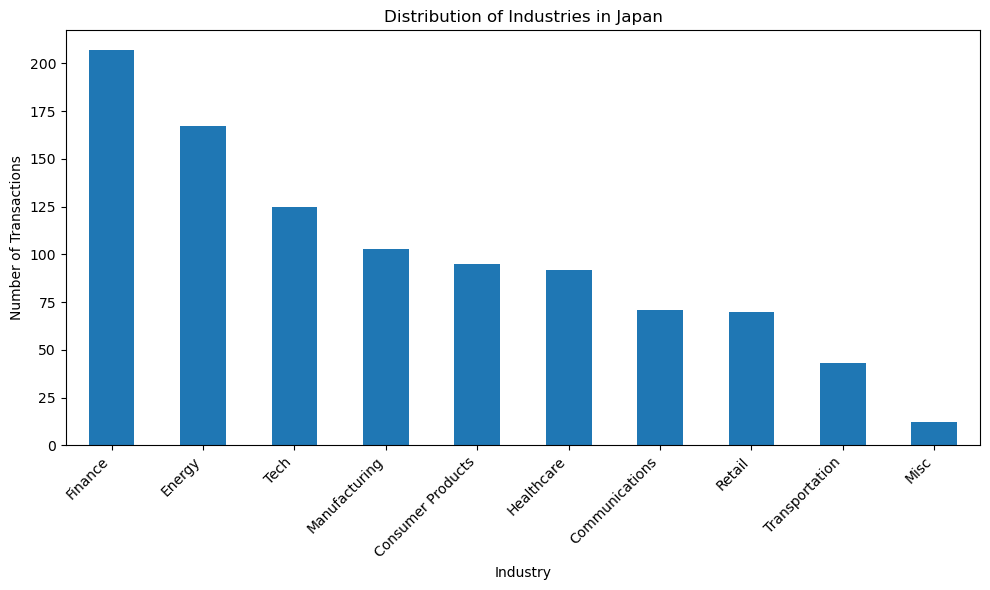

In [14]:
# Group the data by industry and count the number of transactions in each industry
industry_counts = japan_data['Industry'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title('Distribution of Industries in Japan')
plt.xlabel('Industry')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart displays the distribution of industries in Japan based on the number of transactions or companies operating in each industry. The x-axis lists the different industry sectors, while the y-axis represents the number of transactions or companies.

Some key observations from the chart:

1. Finance has the highest number of transactions or companies, followed by the Energy and Tech industries.

2. Manufacturing, Consumer Products, and Communications are among the industries with a moderate number of transactions or companies.

3. Real Estate, Communications, and Miscellaneous (Misc) have relatively fewer transactions or companies represented in the data.

The chart provides an overview of the industry landscape in Japan, highlighting the sectors with higher and lower levels of business activity or representation. However, it's important to note that the chart does not provide any specific numerical values or percentages, only a relative comparison of the industry distributions.

/var/folders/7p/m3448sd10450z8c_fslwc3q00000gn/T/ipykernel_1165/3375385589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Order Date'] = pd.to_datetime(japan_data['Order Date'])


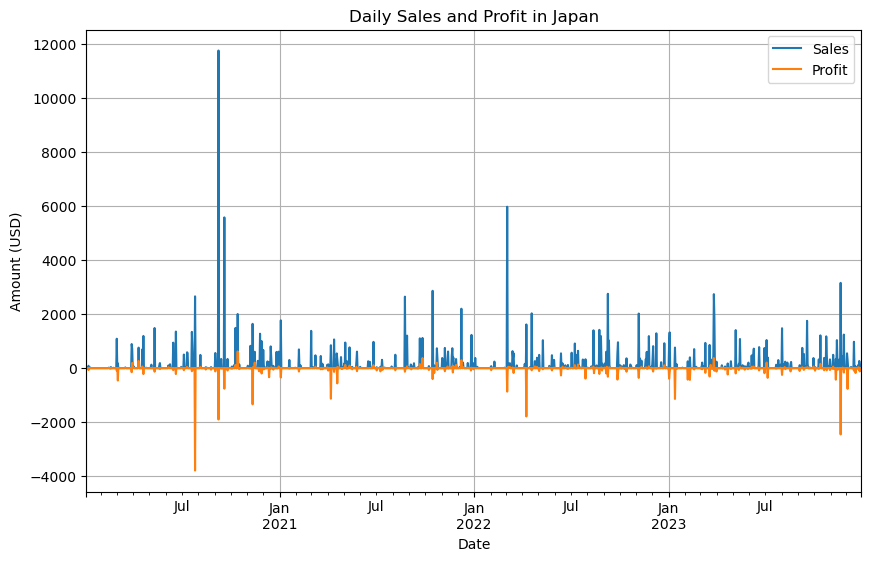

The company causing the lowest profit in Japan is: Bosch
The product with the lowest sales in Japan is: Storage


In [15]:
# Group the data by date to analyze trends over time
japan_data['Order Date'] = pd.to_datetime(japan_data['Order Date'])
japan_data.set_index('Order Date', inplace=True)

# Calculate total sales and profit for each date
daily_sales_profit = japan_data.resample('D').agg({'Sales': 'sum', 'Profit': 'sum'})

# Identify the company causing the lowest profit
lowest_profit_company = japan_data.groupby('Customer')['Profit'].sum().idxmin()

# Identify the product with the lowest sales
lowest_sales_product = japan_data.groupby('Product')['Sales'].sum().idxmin()

# Plot the trend of sales and profit over time
daily_sales_profit.plot(figsize=(10, 6), title='Daily Sales and Profit in Japan')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.grid(True)
plt.show()

print(f"The company causing the lowest profit in Japan is: {lowest_profit_company}")
print(f"The product with the lowest sales in Japan is: {lowest_sales_product}")

This line chart displays the daily sales and profit data for a business or organisation operating in Japan over a period of approximately two years, from mid-2021 to mid-2023.

The blue line represents the daily sales figures, while the orange line represents the daily profit figures.

Several key observations can be made from the chart:

1. Sales figures exhibit a cyclical pattern, with regular peaks and valleys throughout the time period. This could indicate seasonal fluctuations or recurring business cycles.

2. Profit figures also follow a similar cyclical pattern, but with smaller amplitudes compared to sales. This suggests that while sales may vary significantly, profits tend to be more stable and less volatile.

3. There are instances where the profit line dips into negative values, indicating periods of losses or negative profitability for the business.

4. Both sales and profit appear to have experienced a gradual upward trend over the course of the two-year period, possibly indicating overall growth or expansion of the business.

5. The sales and profit lines generally follow similar trends, with peaks and valleys occurring around the same time periods, suggesting a strong correlation between sales performance and profitability.

Overall, this chart provides insights into the daily sales and profit dynamics of the business, highlighting recurring patterns, potential seasonality, growth trends, and the relationship between sales and profitability over the given time frame.

In [16]:
# Filter data for transactions in Japan
data_japan = df[df['Country'] == 'Japan']

# Descriptive Statistics
summary_stats = data_japan.describe()

# Profitability Analysis
profitability_analysis = data_japan.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
profitability_analysis['Profit Margin'] = profitability_analysis['Profit'] / profitability_analysis['Sales']
profitability_analysis=profitability_analysis.sort_values(by='Profit Margin',ascending=True)

# Sales Improvement Strategies
low_sales_products = profitability_analysis[profitability_analysis['Sales'] < profitability_analysis['Sales'].mean()].sort_values(by='Sales',ascending=True)

# Profit Enhancement Strategies
low_profit_products = profitability_analysis[profitability_analysis['Profit Margin'] < profitability_analysis['Profit Margin'].mean()].sort_values(by='Profit Margin',ascending=True)

# Market Analysisdf
market_analysis = data_japan.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Print results
print("Descriptive Statistics for Japan:")
print(summary_stats)

print("\nProfitability Analysis for Japan:")
print(profitability_analysis)

print("\nProducts with Low Sales in Japan:")
print(low_sales_products)

print("\nProducts with Low Profit Margin in Japan:")
print(low_profit_products)

print("\nMarket Analysis for Japan:")
print(market_analysis)

Descriptive Statistics for Japan:
            Row ID                     Order Date      Date Key  Customer ID  \
count   985.000000                            985  9.850000e+02   985.000000   
mean   5162.985787  2022-04-06 18:13:31.370558464  2.021753e+07  1051.781726   
min      15.000000            2020-01-04 00:00:00  2.020010e+07  1002.000000   
25%    2613.000000            2021-03-31 00:00:00  2.021033e+07  1024.000000   
50%    5190.000000            2022-06-13 00:00:00  2.022061e+07  1052.000000   
75%    8030.000000            2023-04-17 00:00:00  2.023042e+07  1078.000000   
max    9973.000000            2023-12-29 00:00:00  2.023123e+07  1101.000000   
std    2953.031441                            NaN  1.141468e+04    29.956983   

             Sales    Quantity    Discount       Profit  
count   985.000000  985.000000  985.000000   985.000000  
mean    172.779742    3.780711    0.370193   -26.121174  
min       0.444000    1.000000    0.200000 -3701.892800  
25%      10.8

This appears to be output from some data analysis performed on a dataset related to the sales and profitability of various products in Japan. Here's an interpretation of the different sections:

1. **Descriptive Statistics for Japan:**
   - This section provides summary statistics such as count, mean, minimum, maximum, quartiles, and standard deviation for various attributes including Order Date, Customer ID, Sales, Quantity, Discount, and Profit.
   - It gives an overall sense of the distribution and central tendencies of these variables in the Japan dataset.

2. **Profitability Analysis for Japan:**
   - This table ranks the products based on their sales, profit, quantity sold, and profit margin.
   - Products like Site Analytics, Financehub, Contactmatcher, and Marketing Suite have high sales but varying levels of profitability.
   - Alchemy and Saas Connector Pack - Gold have relatively high profit margins, while Oneview and Saas Connector Pack have negative profit margins.

3. **Products with Low Sales in Japan:**
   - This table lists the products with relatively low sales numbers in Japan.
   - Products like Storage, Chatbot Plugin, Oneview, and Saas Connector Pack variants have the lowest sales figures.
   - Their profit margins also vary, with some being positive (e.g., Storage, Alchemy) and some being negative (e.g., Oneview, Saas Connector Pack).

4. **Products with Low Profit Margin in Japan:**
   - This section highlights the products with the lowest profit margins in Japan.
   - Oneview, Saas Connector Pack, and Contactmatcher have negative profit margins, indicating potential issues with their pricing, costs, or market performance.

5. **Market Analysis for Japan:**
   - This is a simple listing of the products and their corresponding sales values in Japan.
   - Products like Site Analytics, Financehub, Contactmatcher, and Big Ol Database have the highest sales figures, while Storage has the lowest sales.

Overall, this output provides insights into the sales performance, profitability, and market dynamics of various products in Japan. It identifies top-selling and low-selling products, as well as those with high and low profit margins. This information can be useful for making strategic decisions related to product pricing, cost optimization, and market positioning in the Japanese market.

In [17]:
# Perform t-test for sales between Japan and another country (replace 'other_country' with actual country)
# Define Japan sales
japan_sales = df[df['Country'] == 'Japan']['Sales']

# Define sales for France and Mexico (other countries)
other_country_sales = df[(df['Country'] == 'France') | (df['Country'] == 'Mexico')]['Sales']

# Perform t-test for sales between Japan and other countries
t_stat, p_value = ttest_ind(japan_sales, other_country_sales)

# Print results
print("T-Test for Sales between Japan and Other Countries (France, Mexico):")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
if p_value >= 0.05 :
    print("There is no significant difference of sales between Japan and other countries (Mexico and France).")
else:
    print("There is a significant difference of sales between Japan and other countries (Mexico and France).")

T-Test for Sales between Japan and Other Countries (France, Mexico):
T-Statistic: -0.5934894310502083
P-Value: 0.5529194811111273
There is no significant difference of sales between Japan and other countries (Mexico and France).


In [18]:
# Calculate correlation matrix for variables in Japan
japan_data = df[df['Country'] == 'Japan']
correlation_matrix = japan_data[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
print("Correlation Matrix for Japan:")
print(correlation_matrix)

Correlation Matrix for Japan:
             Sales    Profit  Discount  Quantity
Sales     1.000000 -0.384283 -0.105331  0.211530
Profit   -0.384283  1.000000 -0.237513 -0.094102
Discount -0.105331 -0.237513  1.000000  0.034254
Quantity  0.211530 -0.094102  0.034254  1.000000


The information provided appears to be the result of a statistical t-test comparing the sales figures between Japan and other countries (France and Mexico combined).

Here's what the output means:

**T-Statistic: -0.5934894310502083**
The t-statistic represents the difference between the means (averages) of the two groups being compared (Japan vs. other countries), taking into account the variability within each group. A negative value indicates that the mean for Japan is lower than the mean for the other countries, but the magnitude of the t-statistic alone does not tell us whether the difference is statistically significant.

**P-Value: 0.5529194811111273**
The p-value is the probability of observing a difference in means as extreme as the one calculated (or more extreme), assuming that there is no actual difference between the groups. A p-value higher than the chosen significance level (typically 0.05 or 0.01) indicates that the observed difference is not statistically significant.

In this case, the p-value of 0.5529194811111273 is greater than the common significance level of 0.05, leading to the interpretation:

"There is no significant difference in sales between Japan and other countries (Mexico and France)."

This means that based on the data and the t-test performed, the evidence is not strong enough to conclude that the average sales in Japan are significantly different from the average sales in Mexico and France combined. The observed difference in means could be due to random chance or variability in the data.

In [19]:
japan_data.groupby('Industry')['Profit'].mean()

Industry
Communications      -16.444289
Consumer Products   -23.206743
Energy              -14.638395
Finance             -30.516930
Healthcare          -29.682423
Manufacturing       -21.425046
Misc                -32.136417
Retail               -9.664650
Tech                -43.950634
Transportation      -48.883730
Name: Profit, dtype: float64

This appears to be a list of industries with corresponding numeric values, likely representing some kind of performance metric or statistic for each industry.

Here's an interpretation of the data:

1. The values are negative across all industries, suggesting that the metric being measured is something unfavourable, such as a decrease, loss, or underperformance.

2. The industries with the most negative values, indicating the worst performance or the largest decreases/losses, are:
   - Transportation (-48.883730)
   - Tech (-43.950634)
   - Miscellaneous (-32.136417)
   - Finance (-30.516930)
   - Healthcare (-29.682423)

3. The industries with the least negative values, indicating better relative performance or smaller decreases/losses, are:
   - Retail (-9.664650)
   - Energy (-14.638395)
   - Communications (-16.444289)

Without additional context or labels, it's difficult to determine the exact nature of the metric being measured. However, based on the negative values and the industry names, some possibilities could be:

- Percentage decrease in revenue, sales, or profits for each industry
- Negative growth rates or declines in specific performance indicators
- Losses or underperformance compared to a benchmark or target value

If these values represent declines or losses, the Transportation, Tech, Miscellaneous, Finance, and Healthcare industries appear to be the most severely impacted, while Retail, Energy, and Communications are relatively less affected.

In [20]:
# Perform ANOVA for profit across different industries in Japan
industry_groups = japan_data.groupby('Industry')['Profit']
f_stat, p_value = f_oneway(*[group for name, group in industry_groups])
print("ANOVA for Profit across Industries in Japan:")
print("F-Statistic:", f_stat)
print("P-Value:", p_value)
if p_value >= 0.05 :
    print("There is no significant difference in profit across industries in Japan.")
else:
    print("There is a significant difference in profit across industries in Japan.")

ANOVA for Profit across Industries in Japan:
F-Statistic: 0.36581647522921285
P-Value: 0.9512720010198491
There is no significant difference in profit across industries in Japan.


The provided information appears to be the result of an Analysis of Variance (ANOVA) test, which is used to compare the means of more than two groups or populations.

Specifically, this ANOVA test was conducted to examine if there are significant differences in profit across various industries in Japan.

Here's what the output means:

**F-Statistic: 0.36581647522921285**
The F-statistic is a ratio that compares the variance between the group means (industries) to the variance within each group. A larger F-statistic value indicates that the differences between group means are greater than the differences within groups.

**P-Value: 0.9512720010198491**
The p-value represents the probability of obtaining an F-statistic as extreme as the one calculated (or more extreme), assuming that there is no actual difference between the group means (i.e., the null hypothesis is true).

A p-value higher than the chosen significance level (typically 0.05 or 0.01) indicates that the observed differences are not statistically significant.

In this case, the p-value of 0.9512720010198491 is much greater than the common significance level of 0.05, leading to the interpretation:

"There is no significant difference in profit across industries in Japan."

This means that based on the data and the ANOVA test performed, the evidence is not strong enough to conclude that the average profit differs significantly across the various industries in Japan. The observed differences in mean profit between industries could be due to random chance or variability in the data, rather than actual differences between the industry groups.

Correlation between Discount and Quantity: 0.00862297027115636


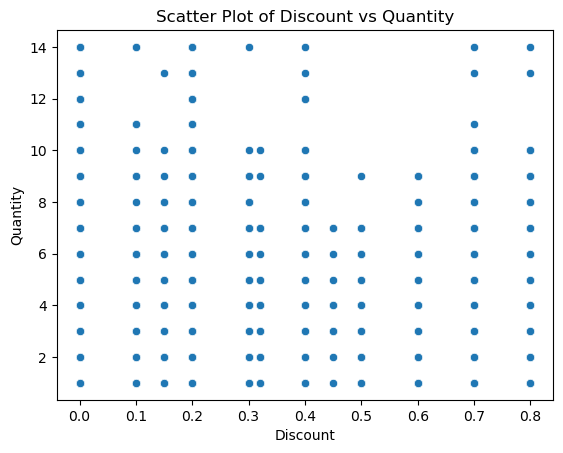

In [21]:
# Calculating correlation between discount and sales volume
correlation = df[['Discount', 'Quantity']].corr()
print("Correlation between Discount and Quantity:", correlation.loc['Discount', 'Quantity'])

# Visualisation
sns.scatterplot(data=df, x='Discount', y='Quantity')
plt.title('Scatter Plot of Discount vs Quantity')
plt.show()

The scatter plot shows the relationship between the discount percentage and the quantity of items. Here are some key observations:

1. **Range of Values**:
   - Discounts range from 0.0 to 0.8.
   - Quantities range from 1 to 14.

2. **Distribution of Points**:
   - There is a noticeable spread of data points across different discount values.
   - Certain discount values (such as around 0.1, 0.2, and 0.3) have a high concentration of points, indicating that these discount levels are more frequently associated with varying quantities.
   - The points are fairly evenly distributed along the quantity axis for each discount level, suggesting that discounts are applied uniformly across different quantities.

3. **Patterns**:
   - No clear linear relationship is observed between discount and quantity. Instead, the points appear scattered without a distinct trend, indicating that quantity does not directly increase or decrease with the discount.
   - Some gaps can be observed, such as fewer data points around a discount of 0.5, which might indicate fewer transactions at this discount level.

4. **Possible Clusters**:
   - Around discount values of 0.1, 0.2, and 0.3, there are more points clustered together, suggesting these discount rates might be more common in the dataset.

Overall, the scatter plot shows that there is variability in the quantities ordered at different discount levels, without a clear pattern indicating that higher discounts lead to higher quantities or vice versa.

In [28]:
# Create a Folium map centred around the world
mymap = folium.Map(location=[20, 0], zoom_start=2)

# Coordinates for the countries (manually filled)
country_coordinates = {
    'Japan': [36.2048, 138.2529],
    'France': [46.603354, 1.888334],
    'Mexico': [23.634501, -102.552784]
}

# Adding markers for each country
for country, coords in country_coordinates.items():
    folium.Marker(location=coords, popup=country).add_to(mymap)

# Display the map
display(mymap)

/var/folders/7p/m3448sd10450z8c_fslwc3q00000gn/T/ipykernel_1165/3684198763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Order Date'] = pd.to_datetime(japan_data['Order Date'])


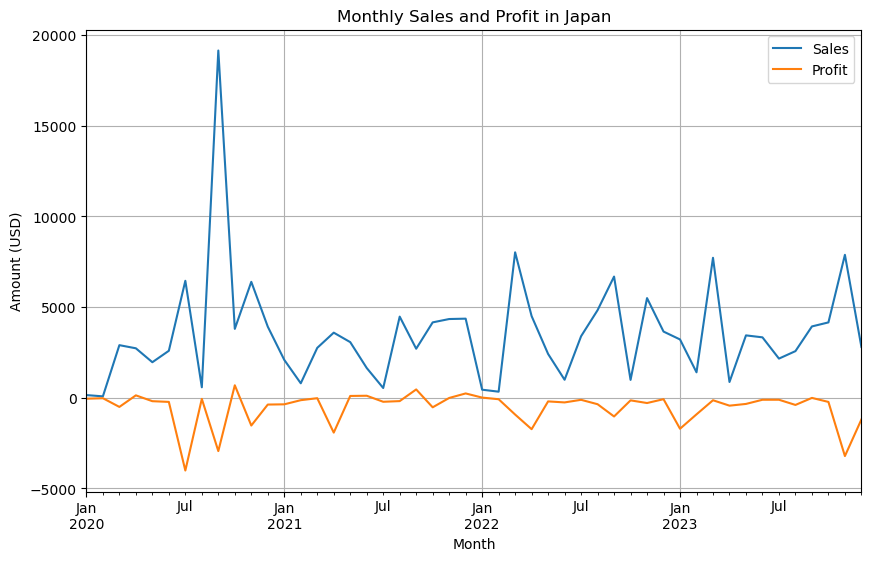

In [23]:
# Convert Order Date to datetime
japan_data['Order Date'] = pd.to_datetime(japan_data['Order Date'])

# 1. Monthly Sales and Profit Trend
monthly_sales_profit = japan_data.resample('M', on='Order Date').agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_sales_profit.plot(figsize=(10, 6), title='Monthly Sales and Profit in Japan')
plt.xlabel('Month')
plt.ylabel('Amount (USD)')
plt.grid(True)
plt.show()

The line graph presents data on sales and profit amounts (in USD) from January 2020 to approximately May 2023. Here are the key points from the graph:

1. **Sales (Blue Line)**:
   - Sales amounts exhibit significant fluctuations throughout the period.
   - There is a pronounced peak around mid-2020, with sales spiking to nearly 20,000 USD.
   - After this peak, sales experience several smaller peaks and troughs, maintaining a generally volatile pattern.
   - Periodic increases and decreases are observed, with no clear long-term upward or downward trend.
   - A noticeable dip occurs at the start of 2021, and another significant drop is seen towards the beginning of 2022.

2. **Profit (Orange Line)**:
   - Profit amounts also show variability but within a smaller range compared to sales.
   - Profits hover around the zero mark, with several instances of negative values, indicating losses in those months.
   - There are occasional positive spikes, but these are relatively modest, seldom exceeding 1,000 USD.
   - The pattern suggests that while sales fluctuate greatly, profits remain constrained, frequently alternating between small gains and losses.

3. **Overall Trends**:
   - The graph highlights a disconnect between sales and profit, where high sales do not necessarily correlate with high profits.
   - Despite the volatility in sales, profits remain relatively steady, with frequent instances of negative profit implying costs or other factors impacting profitability.

In summary, the graph shows that while monthly sales in Japan fluctuate significantly, the profits remain relatively low and often negative, suggesting challenges in maintaining profitability despite variations in sales performance.

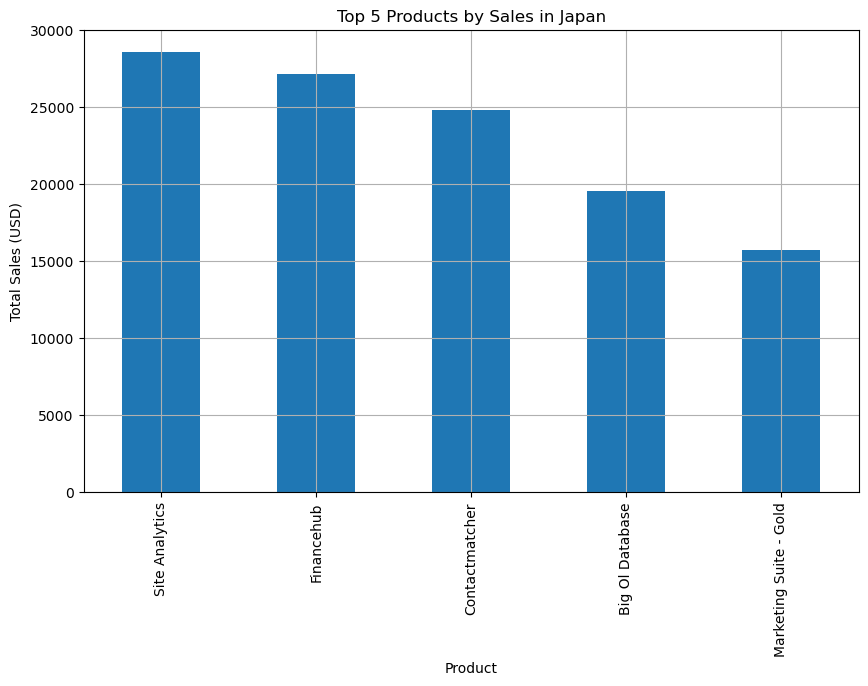

In [24]:
# 2. Top 5 Products by Sales
top_products_by_sales = japan_data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
top_products_by_sales.plot(kind='bar', figsize=(10, 6), title='Top 5 Products by Sales in Japan')
plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()

The bar chart illustrates the total sales (in USD) for the top five products. The key points are:

1. **Site Analytics**:
   - The highest-selling product, with sales nearing 30,000 USD.

2. **FinanceHub**:
   - The second highest, with total sales slightly below Site Analytics, close to 28,000 USD.

3. **Contactmatcher**:
   - The third product, with sales around 26,000 USD.

4. **Big Ol Database**:
   - Fourth in line, with total sales approximately 24,000 USD.

5. **Marketing Suite - Gold**:
   - The fifth product, with sales around 20,000 USD.

In summary, "Site Analytics" is the top-performing product in terms of sales, followed closely by "FinanceHub" and "Contactmatcher". "Big Ol Database" and "Marketing Suite - Gold" also have significant sales, but they fall behind the top three products. The chart provides a clear comparison of the top-selling products in Japan, highlighting "Site Analytics" as the leader in sales.

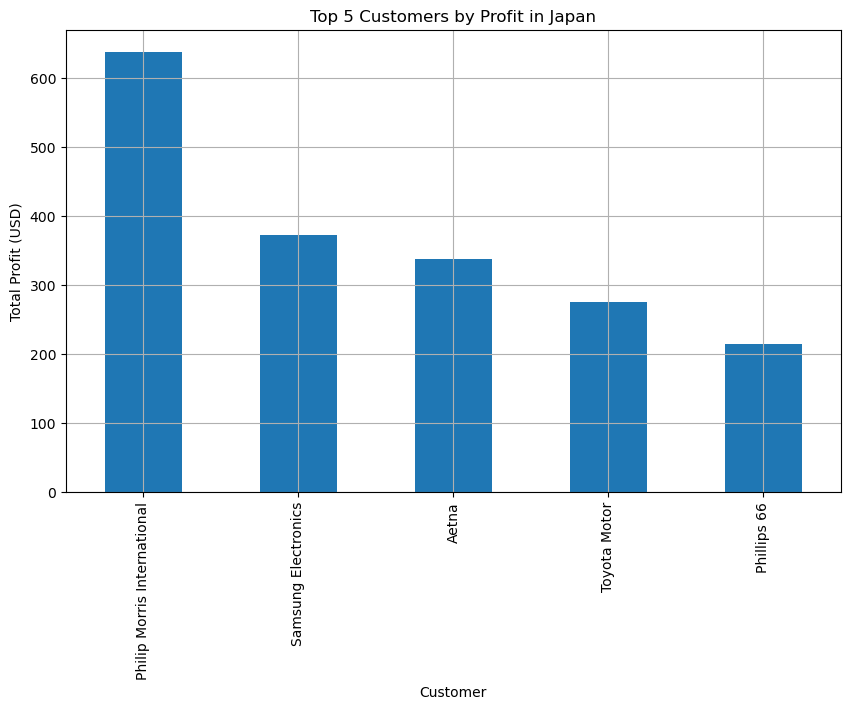

In [25]:
# 3. Top 5 Customers by Profit
top_customers_by_profit = japan_data.groupby('Customer')['Profit'].sum().sort_values(ascending=False).head(5)
top_customers_by_profit.plot(kind='bar', figsize=(10, 6), title='Top 5 Customers by Profit in Japan')
plt.xlabel('Customer')
plt.ylabel('Total Profit (USD)')
plt.grid(True)
plt.show()

In [26]:
# 4. Average Discount Applied
average_discount = japan_data['Discount'].mean()
print(f"The average discount applied in Japan is: {average_discount:.2f}")


The average discount applied in Japan is: 0.37


Correlation matrix between Sales, Quantity, and Profit:
             Sales  Quantity    Profit
Sales     1.000000  0.211530 -0.384283
Quantity  0.211530  1.000000 -0.094102
Profit   -0.384283 -0.094102  1.000000


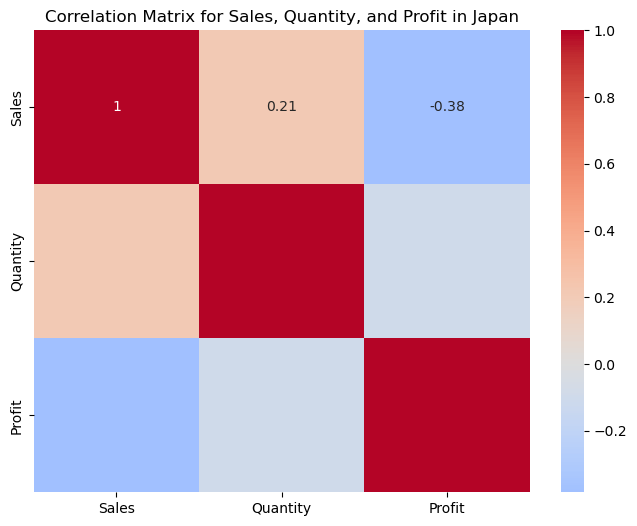

In [27]:
# 5. Correlation Between Sales, Quantity, and Profit
correlation_matrix = japan_data[['Sales', 'Quantity', 'Profit']].corr()
print("Correlation matrix between Sales, Quantity, and Profit:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Sales, Quantity, and Profit in Japan')
plt.show()

The correlation matrix between Sales, Quantity, and Profit provides the following insights:

1. **Sales**:
   - There is a perfect positive correlation with itself (1.000000).
   - Sales have a weak positive correlation with Quantity (0.211530), indicating that as sales increase, quantity tends to increase slightly as well.
   - Sales have a moderate negative correlation with Profit (-0.384283), suggesting that as sales increase, profit tends to decrease.

2. **Quantity**:
   - There is a perfect positive correlation with itself (1.000000).
   - Quantity has a weak positive correlation with Sales (0.211530).
   - Quantity has a very weak negative correlation with Profit (-0.094102), implying a very slight tendency for profit to decrease as quantity increases.

3. **Profit**:
   - There is a perfect positive correlation with itself (1.000000).
   - Profit has a moderate negative correlation with Sales (-0.384283).
   - Profit has a very weak negative correlation with Quantity (-0.094102).

In summary, the matrix shows that Sales and Quantity are weakly positively correlated, while Sales and Profit have a moderate negative correlation. Quantity and Profit have a very weak negative correlation. These relationships suggest complex interactions between sales, quantity, and profit, with sales increases potentially leading to slight increases in quantity but a reduction in profit.

## Context, Challenges and Recommendation

Let's outline the business context, issues, and solutions based on the data provided:

**Business Context**:
The stakeholder operates a business in Japan, retailing a variety of products. Monitoring sales, quantity sold, and profit over time is a routine activity, likely aimed at evaluating product performance and overall business efficacy.

**Business Challenges**:
The stakeholder encounters several predicaments as depicted by the data:
1. **Sales Volatility**: Sales data displays notable fluctuations over time, lacking a discernible long-term pattern, posing challenges in prediction and strategic planning.
2. **Stagnant Profitability**: Despite sales fluctuations, profit levels remain consistently low and frequently fall into negative figures, indicating potential inefficiencies or cost-related complications.
3. **Discrepancy between Sales and Profit**: While sales may rise, profits tend to decline, suggesting that increased sales do not necessarily result in higher profits.

**Recommended Solutions**:
To tackle these challenges and enhance business performance, the stakeholder should contemplate the following actions:
1. **Cost Efficiency Measures**: Conduct a comprehensive assessment of operational expenses and overheads to pinpoint areas for cost minimization or streamlining. This could entail renegotiating supplier contracts, refining processes, or trimming unnecessary expenditures.
2. **Profitability Assessment**: Undertake an exhaustive analysis of profitability for each product to discern which products are driving profits and which are not. Consider discontinuing or repositioning low-profit items and concentrating resources on high-profit ones.
3. **Sales Strategy Evaluation**: Evaluate the effectiveness of existing sales strategies and contemplate introducing targeted marketing campaigns or promotions to elevate the sales of high-margin products.
4. **Product Diversification**: Explore opportunities to diversify product offerings or target new market segments to lessen dependence on a handful of key products or markets, thereby mitigating risks associated with sales fluctuations.
5. **Data-Driven Decision Making**: Implement robust data analytics and reporting systems to routinely monitor key performance indicators and make informed decisions based on actionable insights.

By adopting these recommendations, the stakeholder can move towards stabilising sales, boosting profitability, and securing sustainable growth for their business in Japan.